Análisis Deserción

1. Cargar y Explorar los Datos:


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession
from pyspark.sql.functions import concat, col, when, count, lit

In [10]:
# Cargar los tres datasets
ruta = 'C:/Users/omarc/OneDrive/Escritorio/Proyectos VSC/OmarCano/Track Analítico UNI/05_Datos/02_Datos_Procesados'
ruta2 = 'C:/Users/omarc/OneDrive/Escritorio/Proyectos VSC/OmarCano/Track Analítico UNI/05_Datos/01_Datos_Crudos'

desertados_df = pd.read_csv(f'{ruta}/um_desercion.csv')
cepre_df = pd.read_csv(f'{ruta}/hm_cepre_uni_limpio.csv')
admisiones_df = pd.read_csv(f'{ruta}/hm_admisiones_uni_limpio.csv')
matriculados_df = pd.read_csv(f'{ruta}/hm_matriculados_uni_limpio.csv')
personas_df = pd.read_csv(f'{ruta2}/hm_personas_demo.csv')
colegios_df = pd.read_csv(f'{ruta2}/hm_colegios.csv')

In [20]:
# Crear la columna CodYear
matriculados_df['CodYear'] = matriculados_df['ANIO'] * 10 + matriculados_df['PERIODO']

# Ordenar por IDHASH y CodYear
matriculados_df = matriculados_df.sort_values(by=['IDHASH', 'CodYear'])

In [22]:
# Unir personas_df con desertados_df
merged_df = personas_df.merge(desertados_df, on='IDHASH', how='left')

# Unir con colegios_df
merged_df = merged_df.merge(colegios_df, left_on='COLEGIO', right_on='COLEGIO', how='left')

# Seleccionar columnas relevantes para el análisis
columns_of_interest = [
    'IDHASH', 'COLEGIO', 'COLEGIO_PAIS', 'COLEGIO_DEPA', 'COLEGIO_PROV',
    'COLEGIO_DIST', 'COLEGIO_ANIO_EGRESO', 'ANIO_NACIMIENTO', 'NACIMIENTO_PAIS',
    'NACIMIENTO_DEPA', 'NACIMIENTO_PROV', 'NACIMIENTO_DIST', 'SEXO', 'Deserción',
    'Detalle'
]
merged_df = merged_df[columns_of_interest]

2. Análisis Descriptivo

In [23]:
# Estadísticas descriptivas básicas
descriptive_stats = merged_df.describe(include='all')

# Resumen de datos faltantes
missing_data = merged_df.isnull().sum()

print("Estadísticas Descriptivas:")
print(descriptive_stats)

print("\nDatos Faltantes:")
print(missing_data)


Estadísticas Descriptivas:
                                                   IDHASH COLEGIO  \
count                                               54126   54126   
unique                                              26920    4266   
top     21919A934B13349612F22D886F92E699FDDC02C2706964...       0   
freq                                                   46   16232   
mean                                                  NaN     NaN   
std                                                   NaN     NaN   
min                                                   NaN     NaN   
25%                                                   NaN     NaN   
50%                                                   NaN     NaN   
75%                                                   NaN     NaN   
max                                                   NaN     NaN   

       COLEGIO_PAIS COLEGIO_DEPA        COLEGIO_PROV            COLEGIO_DIST  \
count         37214        37214               37214            

3. Visualizaciones:


C:\Users\omarc\AppData\Local\Temp\ipykernel_12928\1033640846.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df, x='Deserción', palette='viridis')


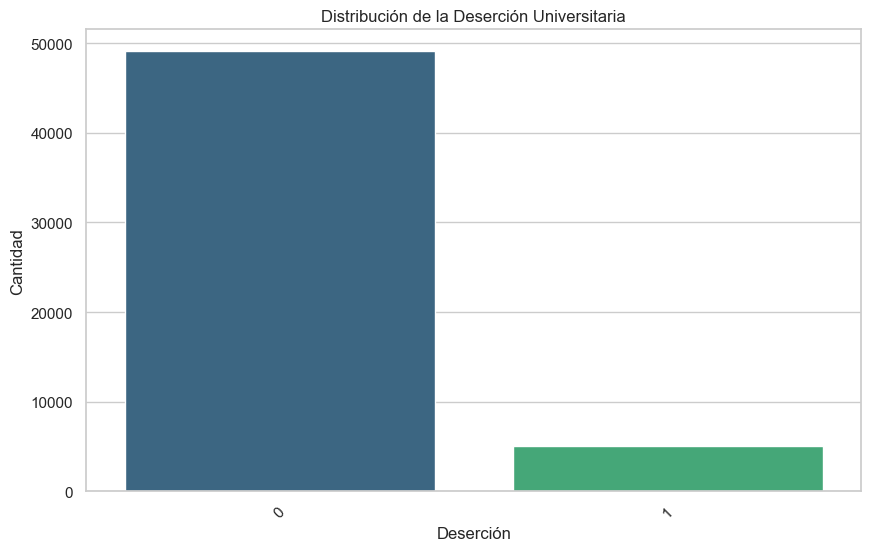

C:\Users\omarc\AppData\Local\Temp\ipykernel_12928\1033640846.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df, y='Detalle', palette='viridis')


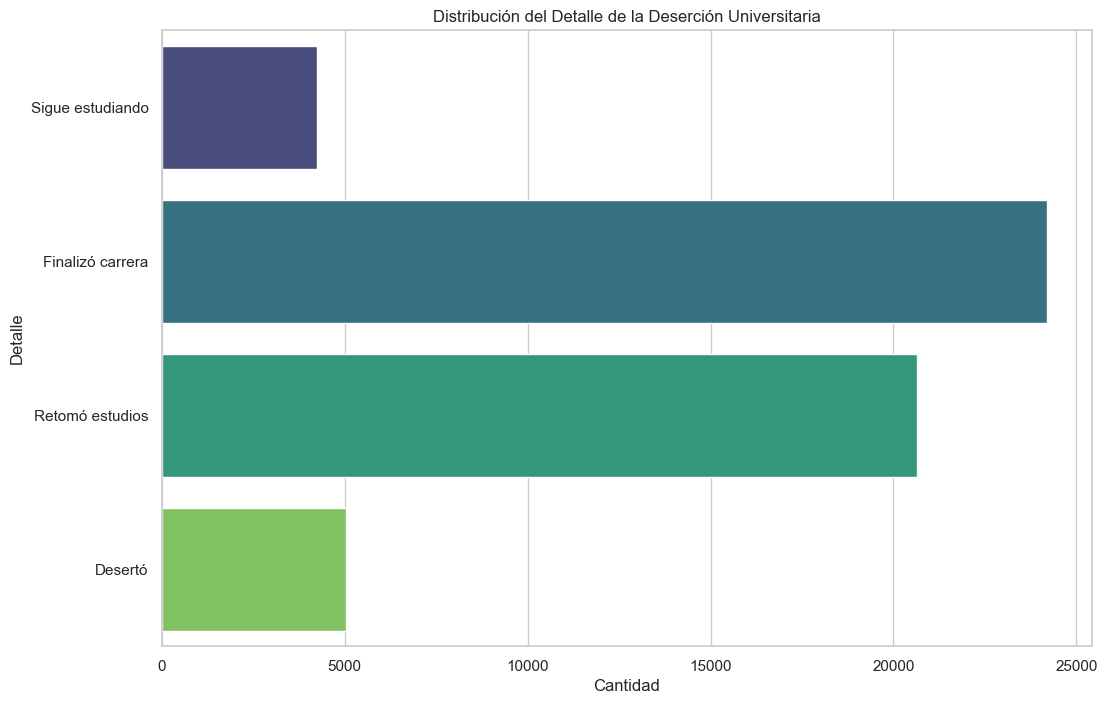

C:\Users\omarc\AppData\Local\Temp\ipykernel_12928\1033640846.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df, x='SEXO', palette='viridis')


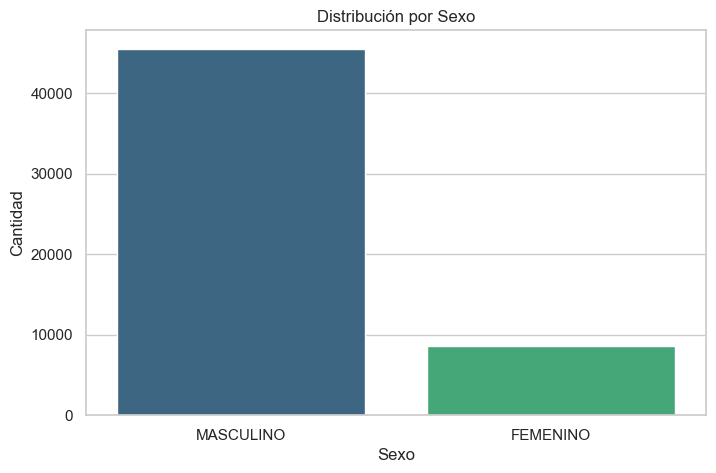

C:\Users\omarc\AppData\Local\Temp\ipykernel_12928\1033640846.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df, y='COLEGIO_PAIS', palette='viridis')


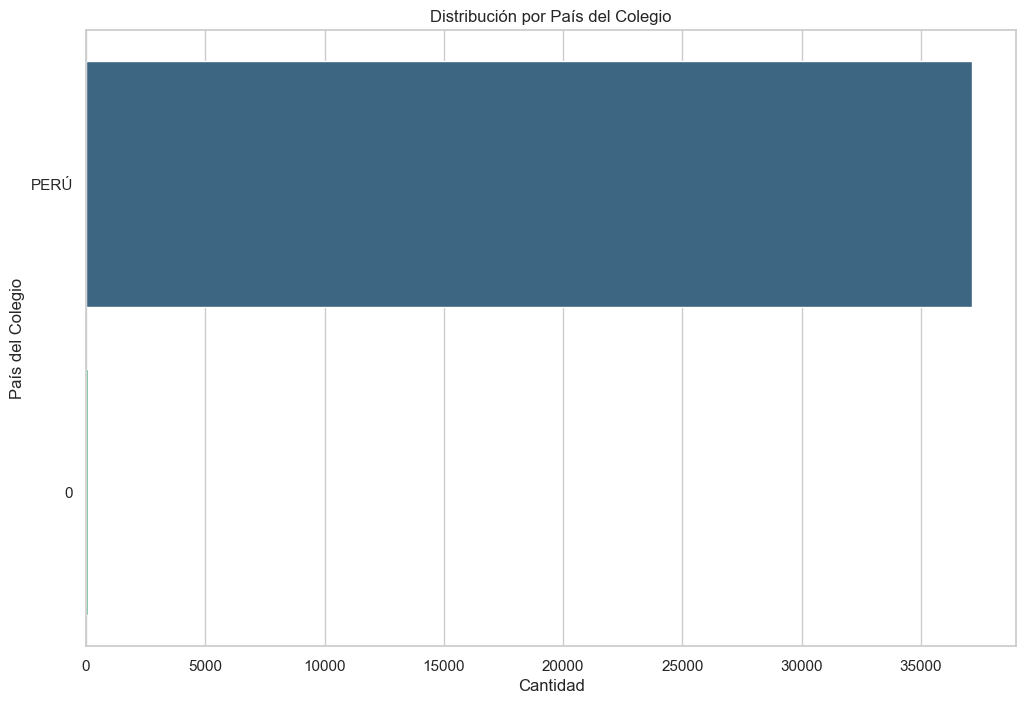

In [24]:
# Configurar el estilo de las visualizaciones
sns.set(style="whitegrid")

# Distribución de la deserción
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_df, x='Deserción', palette='viridis')
plt.title('Distribución de la Deserción Universitaria')
plt.xlabel('Deserción')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

# Distribución del detalle de deserción
plt.figure(figsize=(12, 8))
sns.countplot(data=merged_df, y='Detalle', palette='viridis')
plt.title('Distribución del Detalle de la Deserción Universitaria')
plt.xlabel('Cantidad')
plt.ylabel('Detalle')
plt.show()

# Distribución por sexo
plt.figure(figsize=(8, 5))
sns.countplot(data=merged_df, x='SEXO', palette='viridis')
plt.title('Distribución por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Cantidad')
plt.show()

# Distribución por país de colegio
plt.figure(figsize=(12, 8))
sns.countplot(data=merged_df, y='COLEGIO_PAIS', palette='viridis')
plt.title('Distribución por País del Colegio')
plt.xlabel('Cantidad')
plt.ylabel('País del Colegio')
plt.show()
